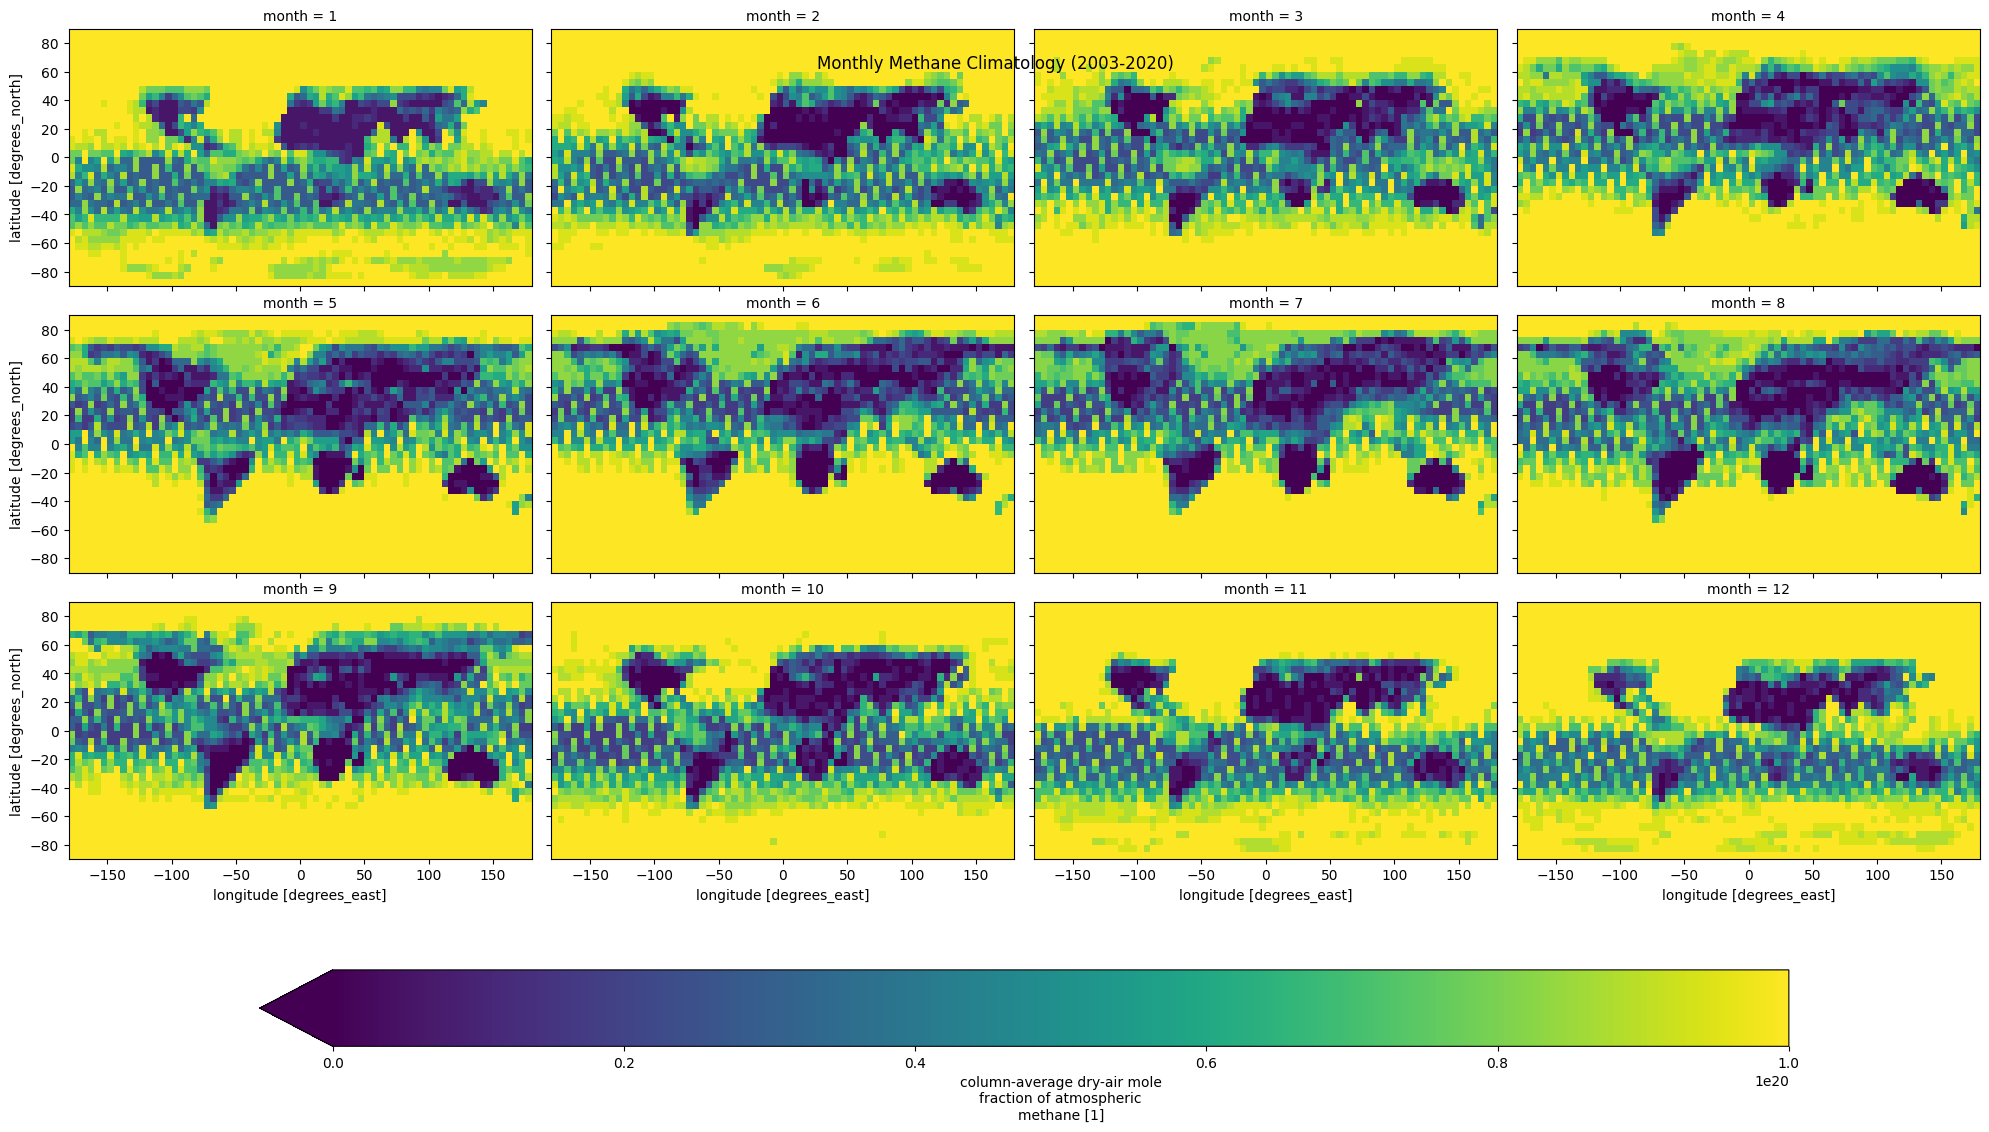

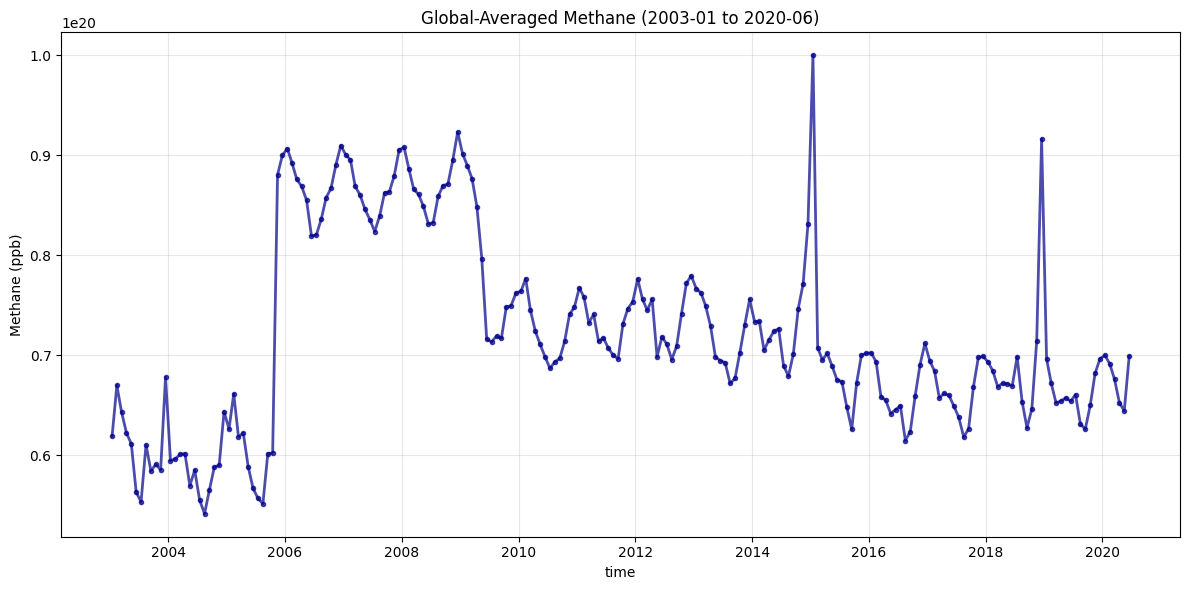

2003-2020年全球平均甲烷呈持续上升趋势，存在小幅季节波动


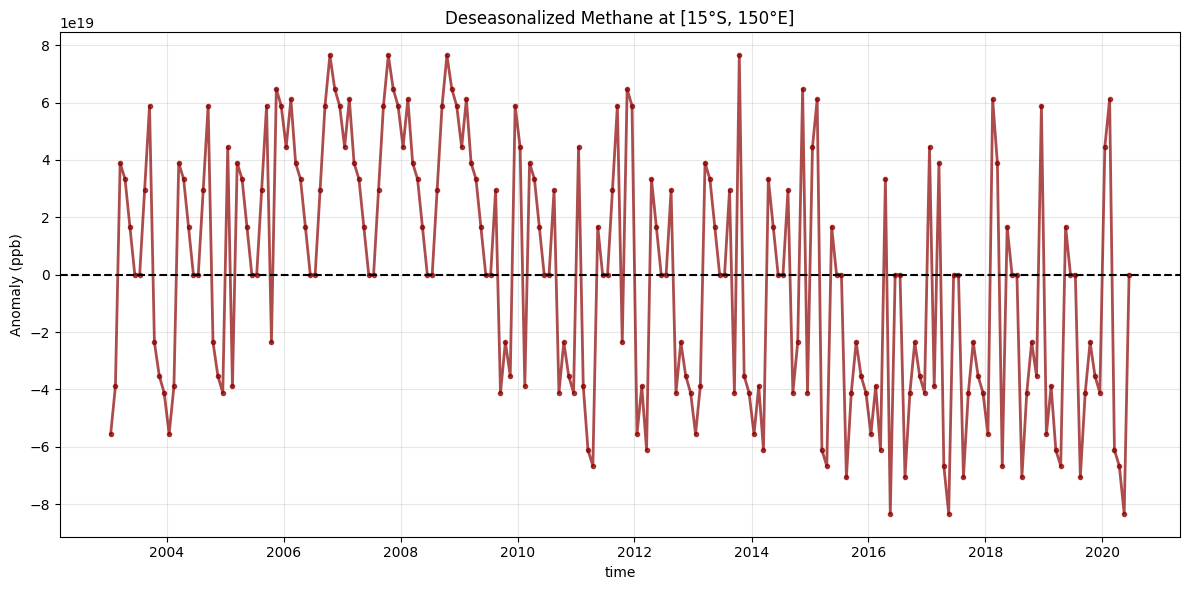

去季节化后，该点甲烷的季节波动被消除，可观察到年际尺度的上升趋势，与全球变化一致。


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
ds = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
ch4 = ds['xch4']

#  月气候态+12子图
ch4_clim = ch4.groupby('time.month').mean(dim='time')
facet = ch4_clim.plot(
    col='month',
    col_wrap=4,
    robust=True,
    cmap='viridis',
    add_colorbar=True,
    cbar_kwargs={
        "orientation": "horizontal",
        "pad": 0.1,
        "shrink": 0.8
    },
    figsize=(20, 12),
    subplot_kws={"adjustable": "box", "aspect": "auto"}
)
facet.fig.suptitle('Monthly Methane Climatology (2003-2020)', y=0.95)
plt.show()

#  全球平均时间序列
ch4_global = ch4.mean(dim=['lat', 'lon'])
plt.figure(figsize=(12, 6))
ch4_global.plot(
    color='darkblue',
    linewidth=2,
    marker='.',
    alpha=0.7
)
plt.title('Global-Averaged Methane (2003-01 to 2020-06)')
plt.ylabel('Methane (ppb)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print("2003-2020年全球平均甲烷呈持续上升趋势，存在小幅季节波动")

#  单点去季节化时间序列
ch4_point = ch4.sel(lat=-15, lon=150, method='nearest')
ch4_point_clim = ch4_point.groupby('time.month').mean(dim='time')
ch4_point_deseason = ch4_point.groupby('time.month') - ch4_point_clim

plt.figure(figsize=(12, 6))
ch4_point_deseason.plot(
    color='darkred',
    linewidth=2,
    marker='.',
    alpha=0.7
)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Deseasonalized Methane at [15°S, 150°E]')
plt.ylabel('Anomaly (ppb)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print("去季节化后，该点甲烷的季节波动被消除，可观察到年际尺度的上升趋势，与全球变化一致。")

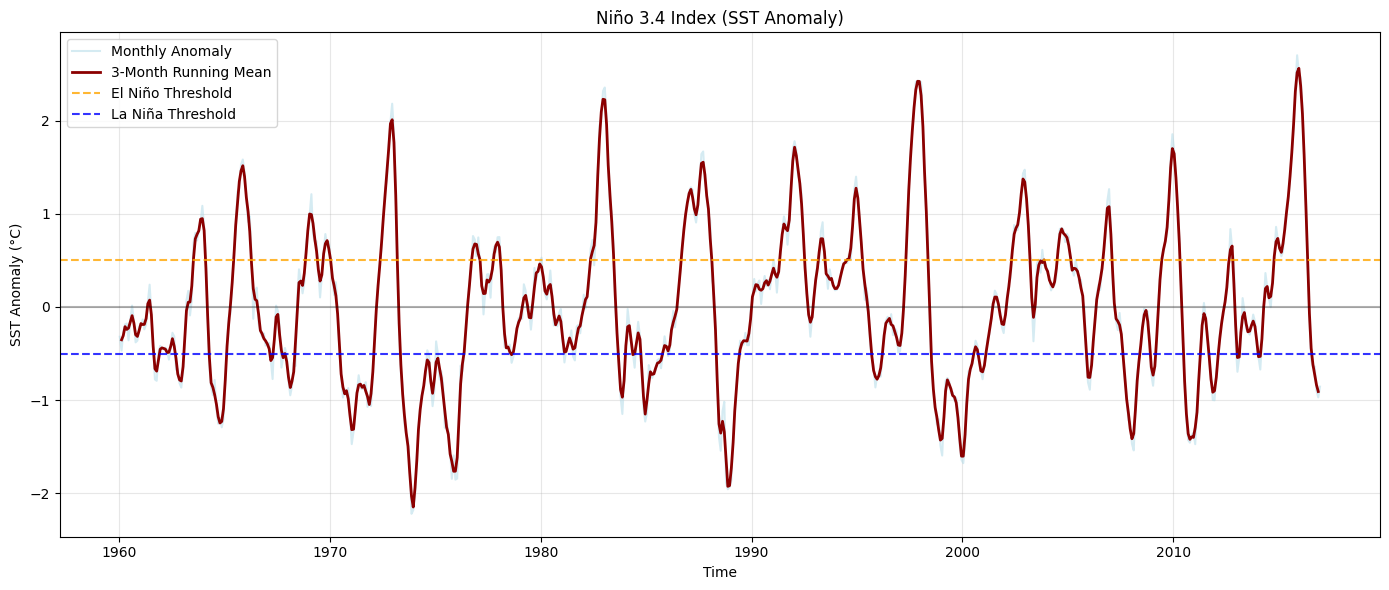

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
file_path = "NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset(file_path, engine="netcdf4")
sst = ds['sst']
nino34_region = sst.sel(lat=slice(-5, 5), lon=slice(190, 240))

# 计算区域平均SST → 月气候态 → 异常值
nino34_sst = nino34_region.mean(dim=['lat', 'lon'])  # 区域平均
nino34_clim = nino34_sst.groupby('time.month').mean(dim='time')  # 月气候态
nino34_anom = nino34_sst.groupby('time.month') - nino34_clim  # 异常值（原始-气候态）

# 计算3个月滑动平均
nino34_anom_3month = nino34_anom.rolling(time=3, center=True).mean()
plt.figure(figsize=(14, 6))
nino34_anom.plot(color='lightblue', alpha=0.5, label='Monthly Anomaly')
nino34_anom_3month.plot(color='darkred', linewidth=2, label='3-Month Running Mean')

# 添加阈值线
plt.axhline(0.5, color='orange', linestyle='--', alpha=0.8, label='El Niño Threshold')
plt.axhline(-0.5, color='blue', linestyle='--', alpha=0.8, label='La Niña Threshold')
plt.axhline(0, color='black', linestyle='-', alpha=0.3)

plt.title('Niño 3.4 Index (SST Anomaly)')
plt.ylabel('SST Anomaly (°C)')
plt.xlabel('Time')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

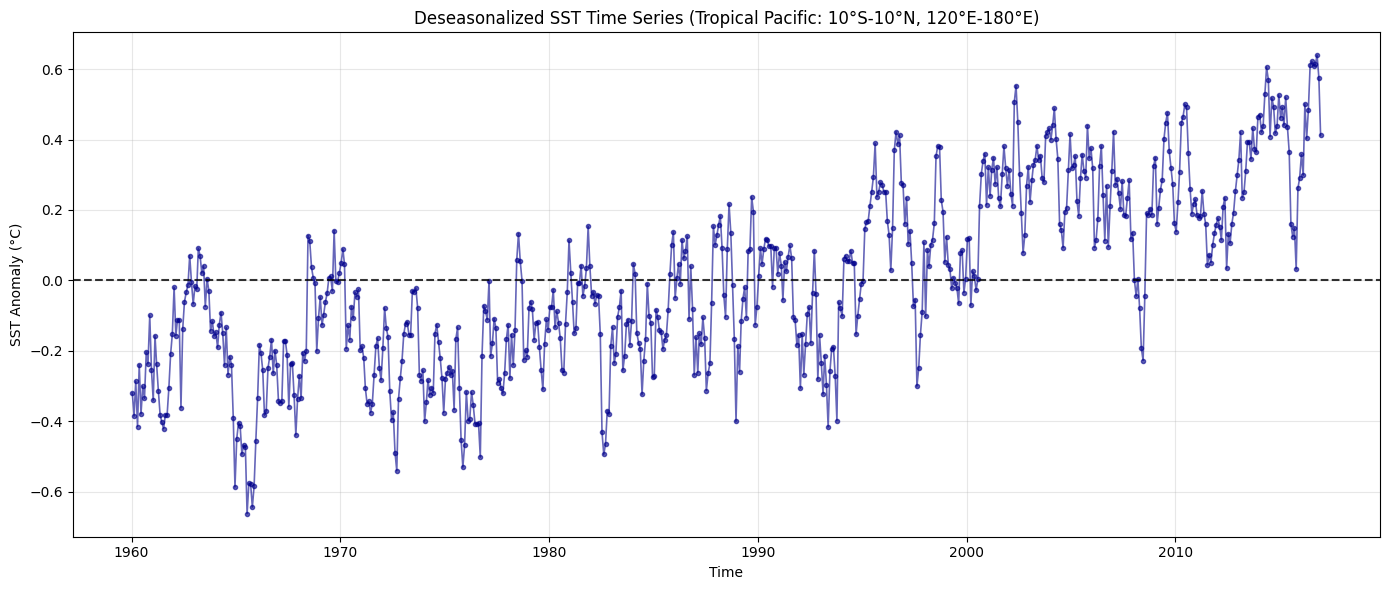

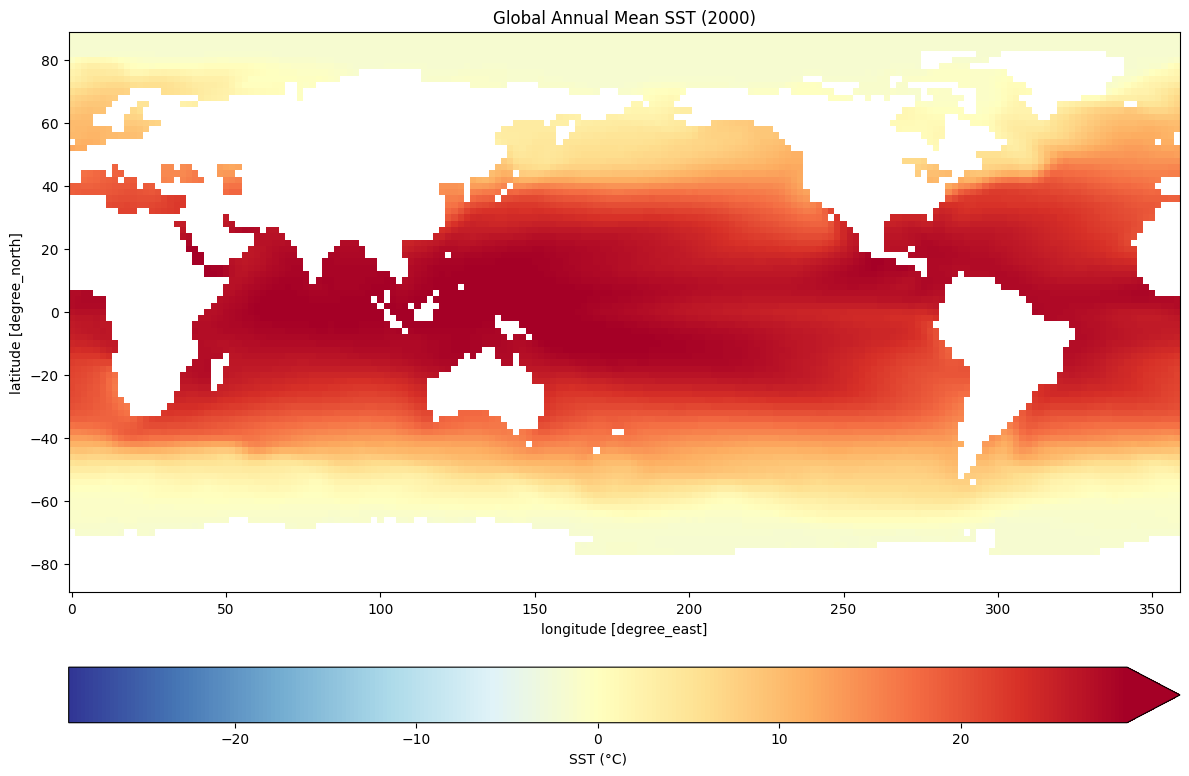

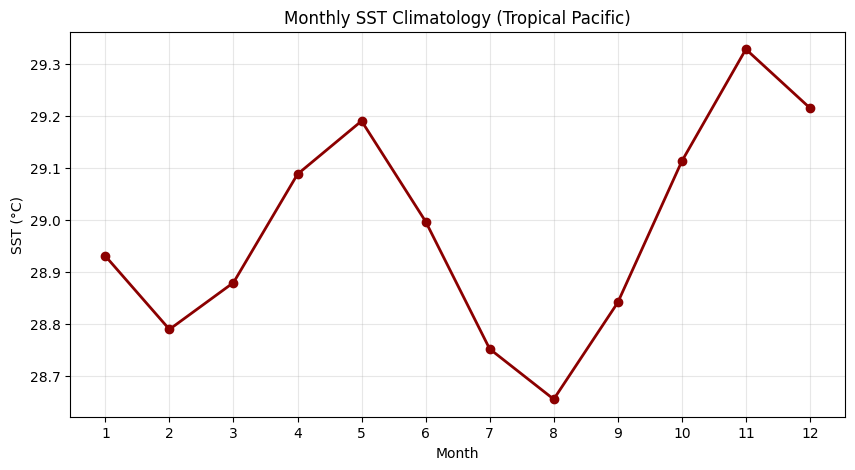

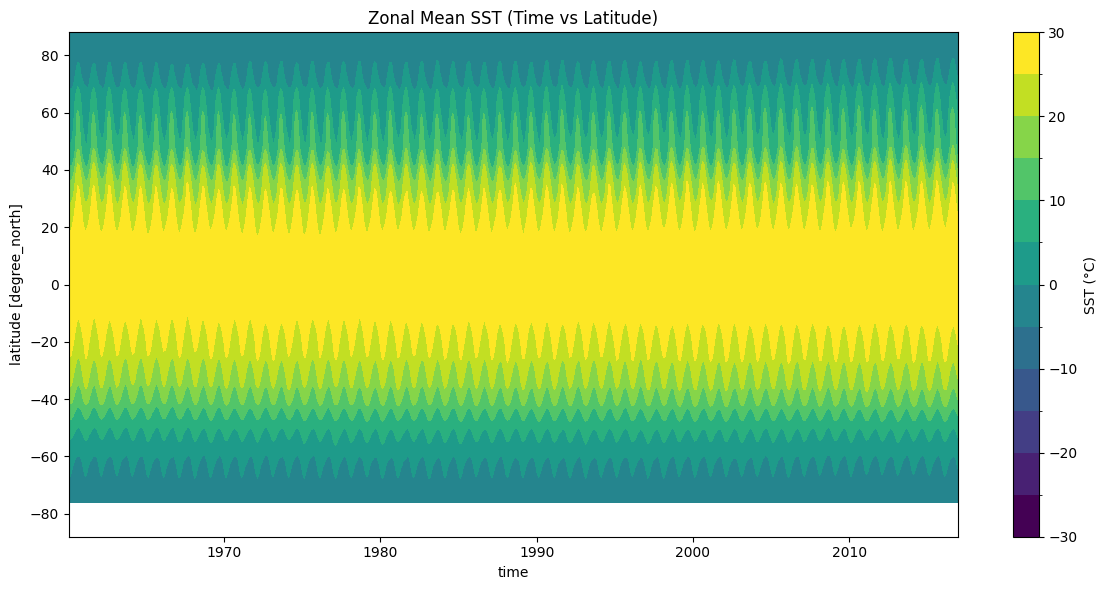

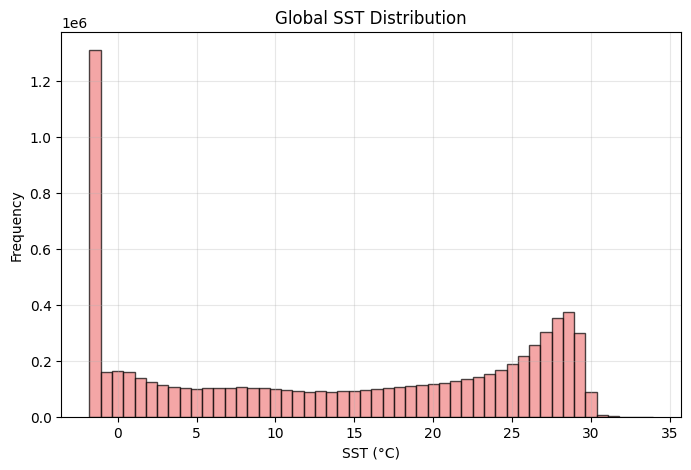

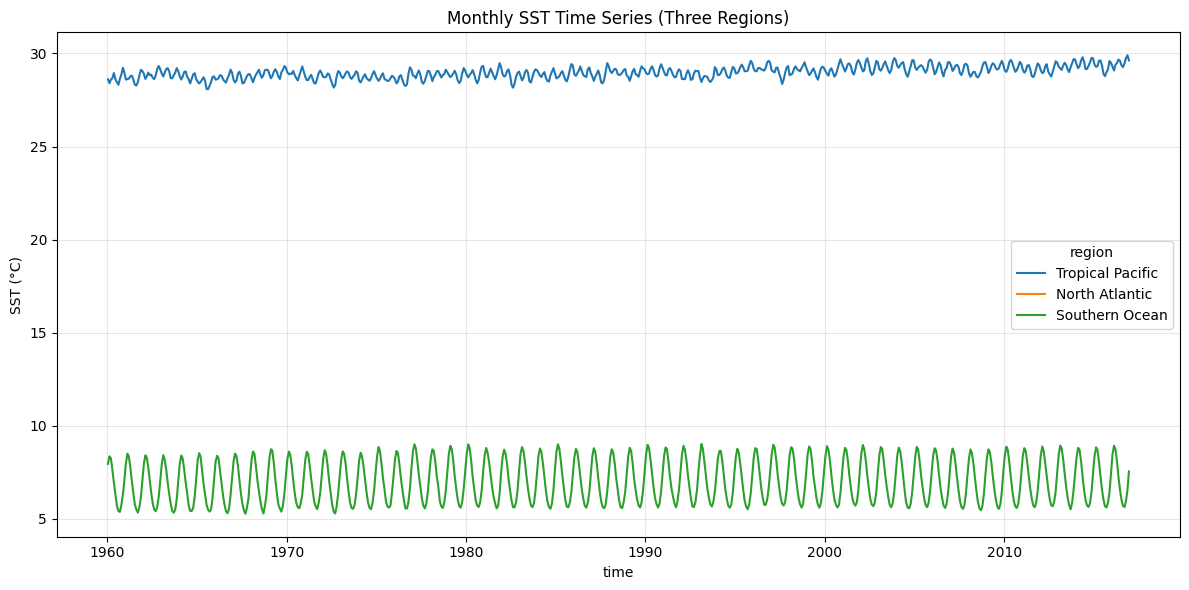

In [3]:
import xarray as xr
import matplotlib.pyplot as plt

file_path = "NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset(file_path, engine="netcdf4")
sst = ds['sst']


### 绘制“热带太平洋去季节化后的时间序列”
region_sst = sst.sel(lat=slice(-10, 10), lon=slice(120, 180)).mean(dim=['lat', 'lon'])
# 计算月气候态 + 去季节化
region_clim = region_sst.groupby('time.month').mean(dim='time')
region_deseason = region_sst.groupby('time.month') - region_clim

# 绘制去季节化时间序列
plt.figure(figsize=(14, 6))
region_deseason.plot(color='darkblue', linewidth=1.2, marker='.', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', alpha=0.8)  # 气候态参考线
plt.title('Deseasonalized SST Time Series (Tropical Pacific: 10°S-10°N, 120°E-180°E)')
plt.ylabel('SST Anomaly (°C)')
plt.xlabel('Time')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 图 1：全球年平均 SST 分布
annual_sst = sst.groupby('time.year').mean(dim='time').sel(year=2000)  # 取 2000 年年平均
annual_sst.plot(
    figsize=(12, 8),
    robust=True,  # 课件重点参数：自动用 2%/98% 分位数调整颜色范围，避免极值干扰
    cmap='RdYlBu_r',  # 冷暖色映射，适合温度数据
    cbar_kwargs={"label": "SST (°C)", "orientation": "horizontal", "pad": 0.1}
)
plt.title('Global Annual Mean SST (2000)')
plt.tight_layout()
plt.show()

# 图 2：区域月气候态折线图
region_clim.plot(
    figsize=(10, 5),
    marker='o', color='darkred', linewidth=2, markersize=6
)
plt.title('Monthly SST Climatology (Tropical Pacific)')
plt.xlabel('Month')
plt.ylabel('SST (°C)')
plt.xticks(range(1, 13))  # 显示 1-12 月
plt.grid(alpha=0.3)
plt.show()

# 图 3：纬向平均 SST 的时间-纬度热力图
zonal_sst = sst.mean(dim='lon')  # 纬向平均（沿经度求和）
zonal_sst.plot.contourf(
    figsize=(12, 6),
    x='time', y='lat',
    levels=15,  # 颜色分级数
    cmap='viridis',
    cbar_kwargs={"label": "SST (°C)"}
)
plt.title('Zonal Mean SST (Time vs Latitude)')
plt.tight_layout()
plt.show()

# 图 4：全球 SST 直方图
sst.plot.hist(
    figsize=(8, 5),
    bins=50,  # 直方图柱数
    color='lightcoral', edgecolor='black', alpha=0.7
)
plt.title('Global SST Distribution')
plt.xlabel('SST (°C)')
plt.ylabel('Frequency')
plt.grid(alpha=0.3)
plt.show()

# 图 5：多区域 SST 时间序列对比
regions = {
    "Tropical Pacific": sst.sel(lat=slice(-10,10), lon=slice(120,180)).mean(dim=['lat','lon']),
    "North Atlantic": sst.sel(lat=slice(30,50), lon=slice(-60,-30)).mean(dim=['lat','lon']),
    "Southern Ocean": sst.sel(lat=slice(-60,-40), lon=slice(0,360)).mean(dim=['lat','lon'])
}
xr.Dataset(regions).to_array(dim='region').plot(
    x='time', hue='region', figsize=(12, 6), linewidth=1.5
)
plt.title('Monthly SST Time Series (Three Regions)')
plt.ylabel('SST (°C)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()